In [1]:
import numpy as np
import json

In [2]:
hm = json.load(open('./metadata/human-release.json'))

In [3]:
hm_names = np.array([x for x in hm])
hm_lengs = np.array([hm[x]['dend']['length'] for x in hm])

In [4]:
d1 = json.load(open('./metadata/D1-summary-ids.json'))
d2 = json.load(open('./metadata/D2-summary-ids.json'))

In [5]:
el_names = np.array(d1['cell_ids'] + d2['cell_ids'])
el_rheos = np.array(d1['fi_rheobase'] + d2['fi_rheobase'])

In [6]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 11})

In [7]:
d1color = 'deepskyblue'
d2color = 'royalblue'

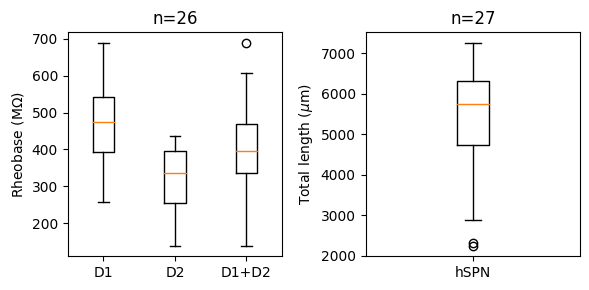

In [8]:
fig = plt.figure(figsize=(6,3))

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Rheobase (M$\Omega$)')
ax.boxplot([d1['fi_rheobase'], d2['fi_rheobase'], d1['fi_rheobase'] + d2['fi_rheobase']])
ax.set_xticks([1,2,3], ['D1', 'D2', 'D1+D2'])
ax.set_title(f"n={len(d1['fi_rheobase'] + d2['fi_rheobase'])}")

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Total length ($\mu$m)')
ax.boxplot(hm_lengs)
ax.set_xticks([1], ['hSPN'])
ax.set_title(f'n={len(hm_lengs)}')

fig.tight_layout();

In [9]:
morph = [(m,l) for (m,l) in zip(hm_names, hm_lengs)]
ephys = [(e,r) for (e,r) in zip(el_names, el_rheos)]

In [10]:
# Duplicate median ephys to match lengths
rmed = np.median([r for (e,r) in zip(el_names[1:], el_rheos[1:])])
emed, = el_names[np.where(el_rheos==rmed)]
print(emed, rmed)
ephys.append((emed, rmed))
assert(len(morph)==len(ephys))

150602_c11_D2 392.7436996849842


In [11]:
morph = sorted(morph, key=lambda x: x[1])
ephys = sorted(ephys, key=lambda x: x[1])

In [12]:
r1 = [e[1] for e in ephys if 'D1' in e[0]]
r2 = [e[1] for e in ephys if 'D2' in e[0]]
rmean1 = np.mean(r1)
rmean2 = np.mean(r2)
rstd1 = np.std(r1)
rstd2 = np.std(r2)

In [13]:
# Map 1:1
hme1 = dict()
hme2 = dict()
for m, e in zip(morph, ephys):
    print(f'{m[0]:18s} {m[1]:8.2f}  -->  {e[0]:15s} {e[1]:6.2f}')
    if 'D1' in e[0]:
        hme1[m[0]] = {'length': m[1], 'ephys': e[0], 'rheobase': e[1], 'zscore': (e[1] - rmean1)/rstd1}
    if 'D2' in e[0]:
        hme2[m[0]] = {'length': m[1], 'ephys': e[0], 'rheobase': e[1], 'zscore': (e[1] - rmean2)/rstd2}

AB6_porta27_cel1    2241.49  -->  150602_c2_D2    138.45
AB6_porta25_cel2    2306.46  -->  160118_c10_D2   171.93
AB6_porta25_cel1    2889.81  -->  150603_c6_D2    204.45
AB6_porta32_cel4    2966.88  -->  150908_c4_D2    256.16
AB6_porta25_cel3    3596.08  -->  150603_c7_D1    256.60
AB6_porta31_cel2    3719.20  -->  151124_c5_D2    303.56
AB5_porta76_cel5    4737.19  -->  150917_c6_D1    335.18
AB6_porta32_cel3    4739.12  -->  151123_c4_D1    335.35
AB6_porta31_cel1    4790.96  -->  151123_c1_D2    335.55
AB5_porta77_cel3    5161.18  -->  151123_c5_D2    337.02
AB6_porta32_cel2    5311.53  -->  151123_c2_D1    392.54
AB6_porta32_cel1    5460.34  -->  150602_c10_D2   392.69
AB5_porta76_cel6    5579.35  -->  150602_c11_D2   392.74
AB5_porta80A_cel11  5744.57  -->  150602_c11_D2   392.74
AB5_porta76_cel1    5865.15  -->  160118_c11_D2   397.11
AB5_porta80A_cel17  5891.71  -->  150908_c7_D2    403.93
AB5_porta80A_cel16  5925.74  -->  150917_c11_D2   435.10
AB5_porta79_cel1    5933.94  --

In [14]:
json.dump(hme1, open('metadata/human-memapd1.json', 'w'), indent=4)
json.dump(hme2, open('metadata/human-memapd2.json', 'w'), indent=4)

In [15]:
d1len = [hme1[m]['length'] for m in hme1]
d2len = [hme2[m]['length'] for m in hme2]
d1rhe = [hme1[m]['rheobase'] for m in hme1]
d2rhe = [hme2[m]['rheobase'] for m in hme2]

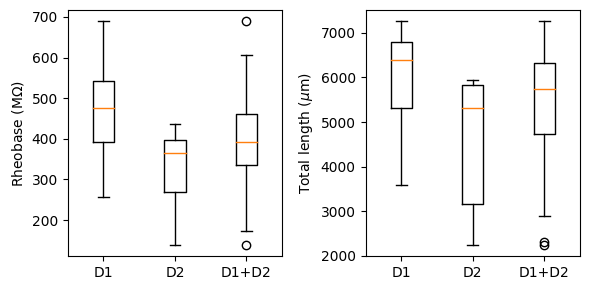

In [16]:
fig = plt.figure(figsize=(6,3))

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Rheobase (M$\Omega$)')
ax.boxplot([d1rhe, d2rhe, d1rhe + d2rhe])
ax.set_xticks([1,2,3], ['D1', 'D2', 'D1+D2'])

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Total length ($\mu$m)')
ax.boxplot([d1len, d2len, d1len + d2len])
ax.set_xticks([1,2,3], ['D1', 'D2', 'D1+D2'])

fig.tight_layout();

In [17]:
import seaborn as sns

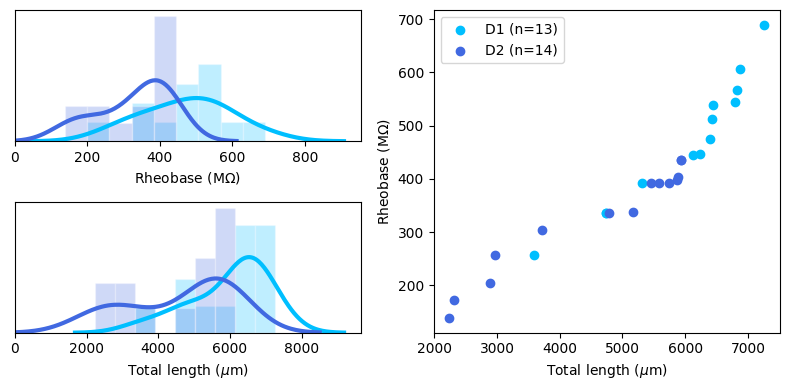

In [18]:
fig = plt.figure(figsize=(8,4))

rbins = np.linspace(min(d1rhe + d2rhe), max(d1rhe + d2rhe), 10)
lbins = np.linspace(min(d1len + d2len), max(d1len + d2len), 10)

ax = fig.add_subplot(2, 2, 1)
ax.hist(d1rhe, bins=rbins, density=True, edgecolor='white', color=d1color, alpha=0.25)
ax.hist(d2rhe, bins=rbins, density=True, edgecolor='white', color=d2color, alpha=0.25)
sns.kdeplot(d1rhe, color=d1color, linewidth=3)
sns.kdeplot(d2rhe, color=d2color, linewidth=3)
ax.set_xlabel('Rheobase (M$\Omega$)')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_xlim(left=0)

ax = fig.add_subplot(2, 2, 3)
ax.hist(d1len, bins=lbins, density=True, edgecolor='white', color=d1color, alpha=0.25)
ax.hist(d2len, bins=lbins, density=True, edgecolor='white', color=d2color, alpha=0.25)
sns.kdeplot(d1len, color=d1color, linewidth=3)
sns.kdeplot(d2len, color=d2color, linewidth=3)
ax.set_xlabel('Total length ($\mu$m)')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_xlim(left=0)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(d1len, d1rhe, color=d1color, label=f'D1 (n={len(d1len)})')
ax.scatter(d2len, d2rhe, color=d2color, label=f'D2 (n={len(d2len)})')
ax.set_xlabel('Total length ($\mu$m)')
ax.set_ylabel('Rheobase (M$\Omega$)')
ax.legend()

fig.tight_layout()

In [19]:
mm = json.load(open('./metadata/mouse-release.json'))

In [20]:
import matplotlib as mpl
Set1 = mpl.cm.get_cmap('Set1')
Pastel1 = mpl.cm.get_cmap('Pastel1')
mcolor = Set1(0.0)
mcolor_light = Pastel1(0.0)

In [21]:
mm_names = np.array([x for x in mm])
mm_lengs = np.array([mm[x]['dend']['length'] for x in mm])

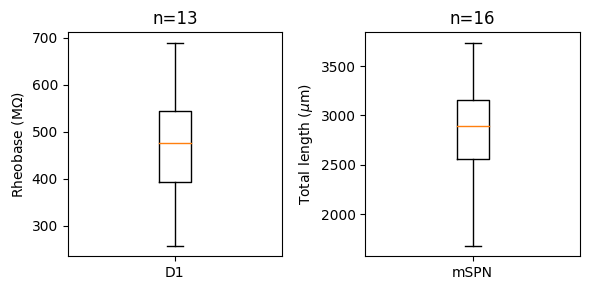

In [22]:
fig = plt.figure(figsize=(6,3))

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Rheobase (M$\Omega$)')
ax.boxplot(d1['fi_rheobase'])
ax.set_xticks([1], ['D1'])
ax.set_title(f"n={len(d1['fi_rheobase'])}")

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Total length ($\mu$m)')
ax.boxplot(mm_lengs)
ax.set_xticks([1], ['mSPN'])
ax.set_title(f"n={len(mm_lengs)}")

fig.tight_layout();

In [23]:
el_names1 = np.array(d1['cell_ids'])
el_rheos1 = np.array(d1['fi_rheobase'])

In [24]:
morph1 = [(m,l) for (m,l) in zip(mm_names, mm_lengs)]
ephys1 = [(e,r) for (e,r) in zip(el_names1, el_rheos1)]

In [25]:
morph1 = sorted(morph1, key=lambda x: x[1])
ephys1 = sorted(ephys1, key=lambda x: x[1])

In [26]:
# Duplicate median ephys to match lengths
rheo = [r for (e,r) in ephys1]
rmed = np.median(rheo)
imed, = np.where(rheo==rmed)[0]
emed = ephys1[imed][0]
ephys1.append((emed, rmed))

emed, rmed = ephys1[imed-1]
ephys1.append((emed, rmed))

emed, rmed = ephys1[imed+1]
ephys1.append((emed, rmed))

assert(len(morph1)==len(ephys1))

In [27]:
morph1 = sorted(morph1, key=lambda x: x[1])
ephys1 = sorted(ephys1, key=lambda x: x[1])

In [28]:
rheo = [r for (e,r) in ephys1]
rmean = np.mean(rheo)
rstd = np.std(rheo)

In [29]:
# Map 1:1
mme1 = dict()
for m, e in zip(morph1, ephys1):
    print(f'{m[0]:18s} {m[1]:8.2f}  -->  {e[0]:15s} {e[1]:6.2f}')
    mme1[m[0]] = {'length': m[1], 'ephys': e[0], 'rheobase': e[1], 'zscore': (e[1] - rmean)/rstd}

animal_1_n27_04102017_cel2  1677.02  -->  150603_c7_D1    256.60
animal_1_n24_04102017_cel1  2169.70  -->  150917_c6_D1    335.18
animal_5_n27_04102017_cel1  2471.89  -->  151123_c4_D1    335.35
animal_1_n21_04102017_cel1  2478.17  -->  151123_c2_D1    392.54
animal_1_n33_04102017_cel2  2583.59  -->  150602_c1_D1    444.74
animal_5_n15_04102017_cel1  2680.71  -->  160118_c7_D1    447.40
animal_1_n30_04102017_cel1  2809.79  -->  160118_c7_D1    447.40
animal_5_n21_04102017_cel1  2886.09  -->  150908_c5_D1    475.42
animal_1_n33_04102017_cel1  2893.23  -->  150908_c5_D1    475.42
animal_1_n18_04102017_cel1  2923.55  -->  160118_c9_D1    511.77
animal_5_n22_04102017_cel2  2949.80  -->  160118_c9_D1    511.77
animal_5_n27_04102017_cel2  3147.58  -->  150917_c10_D1   538.68
animal_5_n22_04102017_cel1  3181.03  -->  150602_c9_D1    543.32
animal_5_n18_04102017_cel1  3185.32  -->  160118_c8_D1    566.91
animal_1_n27_04102017_cel1  3278.91  -->  150917_c9_D1    605.95
animal_1_n30_04102017_cel

In [30]:
json.dump(mme1, open('metadata/mouse-memapd1.json', 'w'), indent=4)

In [31]:
md1len = [mme1[m]['length'] for m in mme1]
md1rhe = [mme1[m]['rheobase'] for m in mme1]

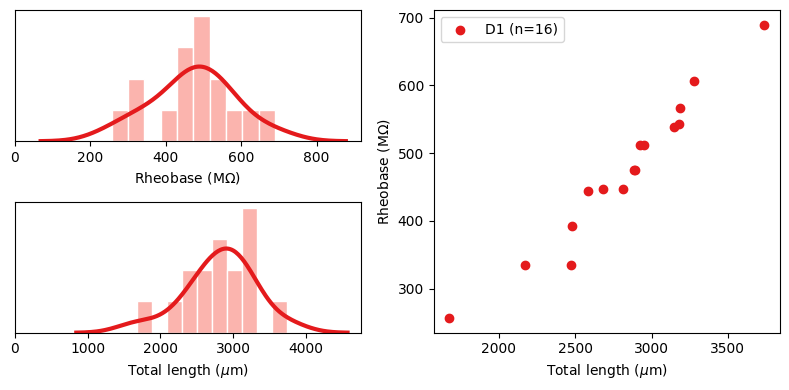

In [32]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(2, 2, 1)
ax.hist(md1rhe, density=True, edgecolor='white', color=mcolor_light)
sns.kdeplot(md1rhe, color=mcolor, linewidth=3)
ax.set_xlabel('Rheobase (M$\Omega$)')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_xlim(left=0)

ax = fig.add_subplot(2, 2, 3)
ax.hist(md1len, density=True, edgecolor='white', color=mcolor_light)
sns.kdeplot(md1len, color=mcolor, linewidth=3)
ax.set_xlabel('Total length ($\mu$m)')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_xlim(left=0)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(md1len, md1rhe, color=mcolor, label=f'D1 (n={len(md1len)})')
ax.set_xlabel('Total length ($\mu$m)')
ax.set_ylabel('Rheobase (M$\Omega$)')
ax.legend()

fig.tight_layout()

In [39]:
mr1 = [mme1[x]['rheobase'] for x in mme1]
me1 = [mme1[x]['ephys'] for x in mme1]
hr1 = [hme1[x]['rheobase'] for x in hme1]
he1 = [hme1[x]['ephys'] for x in hme1]

In [49]:
mouse_median_cell = me1[np.where(mr1==np.median(mr1))[0][0]]
human_median_cell = he1[np.where(hr1==np.median(hr1))[0][0]]
assert(mouse_median_cell==human_median_cell)

print('Median D1 SPN:', human_median_cell)
print('Mouse morphology:', [(x, mme1[x]['length']) for x in mme1 if mme1[x]['ephys']==mouse_median_cell])
print('Human morphology:', [(x, hme1[x]['length']) for x in hme1 if hme1[x]['ephys']==human_median_cell])

Median D1 SPN: 150908_c5_D1
Mouse morphology: [('animal_5_n21_04102017_cel1', 2886.0851631717715), ('animal_1_n33_04102017_cel1', 2893.233975711973)]
Human morphology: [('AB5_porta76_cel4', 6401.99032878103)]
